# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.

---

### $\textbf{\textcolor{Goldenrod}{Question 1:}}$ 

Pour un bruit blanc $ Z_t $ de moyenne nulle et de variance $ \sigma^2 $, on a:

$$
\mathbb{E}(Z_t) = 0
$$
Et
$$
\text{Cov}(Z_t, Z_{t+h}) = 
\begin{cases}
\sigma^2, & \text{si } h = 0 \\
0, & \text{si } h \neq 0
\end{cases}
\tag{1}
$$

## Processus 1: 
Pour $ X_t = a + bZ_t + Z_{t-1} $ où $ Z_t \sim \text{WN}(0, \sigma^2) $, on a : 

- Moyenne: 

$$
\mathbb{E}(X_t) = \mathbb{E}(a + bZ_t + Z_{t-1})
$$

Or $ \mathbb{E}(Z_t) = \mathbb{E}(Z_{t-1}) = 0 $, donc :

$$
\mathbb{E}(X_t) = a + b \cdot \mathbb{E}(Z_t) + \mathbb{E}(Z_{t-1}) = a
$$

$$
\textbf{\textcolor{Goldenrod}{\boxed{\mathbb{E}(X_t) = a}}} 
$$

- l'autocovariance :

$$
\text{Cov}(X_t, X_{t+h}) = \mathbb{E}[(X_t - \mathbb{E}(X_t))(X_{t+h} - \mathbb{E}(X_{t+h}))]
$$

Or $ \mathbb{E}(X_t) = a $, donc :

$$
\text{Cov}(X_t, X_{t+h}) = \mathbb{E}[(X_t - a)(X_{t+h} - a)]
$$

Et comme $X_t - a = bZ_t + Z_{t-1}, \quad X_{t+h} - a = bZ_{t+h} + Z_{t+h-1}$, on a :


$$
\mathrm{Cov}(X_t, X_{t+h}) = \mathbb{E} \left[ (bZ_t + Z_{t-1}) (bZ_{t+h} + Z_{t+h-1}) \right]
$$

$$
\hspace{6.45cm} = b^2 \mathbb{E}[Z_t Z_{t+h}] + b \mathbb{E}[Z_t Z_{t+h-1}] + b \mathbb{E}[Z_{t-1} Z_{t+h}] + \mathbb{E}[Z_{t-1} Z_{t+h-1}].
$$

En utilisant (1), 
- Pour $ h = 0 $ :

$$
\text{Cov}(X_t, X_{t}) = \text{Var}(X_t) = b^2 \sigma^2 + 0 +  0 + \sigma^2 = (b^2 + 1)\sigma^2.
$$


- Pour $ h = 1 $ :

$$
\text{Cov}(X_t, X_{t+1}) = 0 + b \sigma^2 + 0 +  0 + 0 = b \sigma^2.
$$

- Pour $ h > 1 $,

$$
\text{Cov}(X_t, X_{t+h}) = 0
$$

Donc 
$$
\textbf{\textcolor{Goldenrod}{\boxed{
\text{Cov}(X_t, X_{t+h}) = 
\begin{cases}
(b^2 + 1)\sigma^2, & \text{si } h = 0 \\
b\sigma^2, & \text{si } h = 1 \\  
0, & \text{si } h > 1
\end{cases}
}}}
$$
On remarque que $\text{Cov}(X_t, X_{t+h}) $ ne dépend pas de $t$ et $\text{Var}(X_t)$ = $(b^2 + 1)\sigma^2 < \infty$, $X_t$ est donc un processuss stationnaire faible.

---

## Processus 2: 

$ X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a $

Pour ce processus:, 

- Moyenne: 

$$
\mathbb{E}(X_t) = \mathbb{E} \left( \sum_{k=0}^{K} 2^{-k} Z_{t-k} + a \right)
$$

Or $ \mathbb{E}(Z_{t-k}) = 0 $ pour tout $ k $, donc :

$$
\textbf{\textcolor{Goldenrod}{\boxed{\mathbb{E}(X_t) = a}}} 
$$

- Autocovariance : 

$$
\mathrm{Cov}(X_t, X_{t+h}) = \mathbb{E}[(X_t - \mathbb{E}(X_t))(X_{t+h} - \mathbb{E}(X_{t+h}))] = \mathbb{E}[(X_t - a)(X_{t+h} - a)].
$$

Or

$$
X_t - a = \sum_{k=0}^{K} 2^{-k} Z_{t-k}, \quad X_{t+h} - a = \sum_{j=0}^{K} 2^{-j} Z_{t+h-j}.
$$

Ainsi :

$$
\mathrm{Cov}(X_t, X_{t+h}) = \mathbb{E} \left[ \left( \sum_{k=0}^{K} 2^{-k} Z_{t-k} \right) \left( \sum_{j=0}^{K} 2^{-j} Z_{t+h-j} \right) \right] = \sum_{k=0}^{K} \sum_{j=0}^{K} 2^{-k} 2^{-j} \mathbb{E}[Z_{t-k} Z_{t+h-j}].
$$


Puisque $Z_t$ est un processus de bruit blanc avec une variance $\sigma^2$, nous avons :

$$
\mathbb{E}[Z_{t-k} Z_{t+h-j}] = 
\begin{cases} 
\sigma^2 & \text{si } t-k = t+h-j \implies k = j + h, \\
0 & \text{sinon}.
\end{cases}
$$

Donc pour que $\mathbb{E}[Z_{t-k} Z_{t+h-j}]$ soit non nul, il faut que $k = j + h$. Ainsi, :

$$
\mathrm{Cov}(X_t, X_{t+h}) = \sum_{j=0}^{K-h} 2^{-(j+h)} 2^{-j} \sigma^2 = \sigma^2 \sum_{j=0}^{K-h} 2^{-2j-h} = \sigma^2 \cdot 2^{-h} \sum_{j=0}^{K-h} 2^{-2j}.
$$


$$
\sum_{j=0}^{K-h} 2^{-2j} = \frac{1 - (2^{-2})^{K-h+1}}{1 - 2^{-2}} = \frac{1 - 4^{-(K-h+1)}}{\frac{3}{4}} = \frac{4}{3} \left( 1 - 4^{-(K-h+1)} \right).
$$

Donc
$$
\mathrm{Cov}(X_t, X_{t+h}) = \sigma^2 \cdot 2^{-h} \cdot \frac{4}{3} \left( 1 - 4^{-(K-h+1)} \right).
$$


Ainsi:

$$
\textbf{\textcolor{Goldenrod}{\boxed{\mathrm{Cov}(X_t, X_{t+h}) = \frac{4 \sigma^2}{3} \cdot 2^{-h} \left( 1 - 4^{-(K-h+1)} \right)}}}

$$

Quand $K \to \infty$,  $4^{-(K-h+1)} \to 0$, on a :

$$
\mathrm{Cov}(X_t, X_{t+h}) = \frac{4 \sigma^2}{3} \cdot 2^{-h}.
$$
---
## Processus Harmonique :

$ X_t = A_0 \cos(\lambda_0 t + \Phi_0) + Z_t $

Pour ce processus, on a:

- Moyenne : 

$$
\mathbb{E}(X_t) = \mathbb{E} \left[ A_0 \cos(\lambda_0 t + \Phi_0) + Z_t \right]
$$

Puisque $ \Phi_0 \sim \mathcal{U}([0, 2\pi]) $ et que $ \mathbb{E}[\cos(\lambda_0 t + \Phi_0)] = 0 $ (la moyenne d'un cosinus sur une période complète est nulle) et $ \mathbb{E}[Z_t] = 0 $, On a :

$$
\textbf{\textcolor{Goldenrod}{\boxed{\mathbb{E}(X_t) = 0}}}
$$

- Autocovariance :

Pour $ h \geq 0 $, l'autocovariance est :

$$
\text{Cov}(X_t, X_{t+h}) = \mathbb{E} \left[ \left( A_0 \cos(\lambda_0 t + \Phi_0) + Z_t \right) \left( A_0 \cos(\lambda_0 (t+h) + \Phi_0) + Z_{t+h} \right) \right]= A_0^2 \mathbb{E}[\cos(\lambda_0 t + \Phi_0) \cos(\lambda_0 (t+h) + \Phi_0)] + \text{Cov}(Z_t, Z_{t+h})
$$


Or d'après l'identité trigonométrique pour le produit des cosinus :

$$
\cos A \cos B = \frac{1}{2}[\cos(A - B) + \cos(A + B)]
$$

Donc,

$$
\mathbb{E}[\cos(\lambda_0 t + \Phi_0) \cos(\lambda_0 (t+h) + \Phi_0)] = \frac{1}{2} \cos(\lambda_0 h)
$$

Ainsi,

$$
\textbf{\textcolor{Goldenrod}{\boxed{\text{Cov}(X_t, X_{t+h}) = \frac{A_0^2}{2} \cos(\lambda_0 h) + \sigma^2 \delta_{h, 0}}}}
$$

où $\delta_{h, 0}$ est la fonction delta de Kronecker, égale à 1 si $h = 0$ et 0 sinon.


---
### $\textbf{\textcolor{Goldenrod}{Question 2:}}$

La moyenne empirique `empirical_mean(X)` d'une série temporelle $ X_t $ est donné par:

$$
\hat{\mu} = \frac{1}{T} \sum_{t=1}^{T} X_t,
$$

où $ T $ est le nombre total d'échantillons.


Et la fonction d'autocovariance empirique `empirical_autocovariance(X, h)`  d'une série temporelle $ X_t $ pour un décalage $ h $ est :

$$
\hat{\gamma}(h) = \frac{1}{T - h} \sum_{t=1}^{T-h} (X_t - \hat{\mu})(X_{t+h} - \hat{\mu}),
$$

où $ \hat{\mu} $ est la moyenne empirique calculée et $ h $ est le décalage.

### Fonctions de Simulation des Processus

- `simulate_process_1(T, K, a, sigma)` : Simule le processus 1 (Moving Average Process) pour une taille d'échantillon $ T $, un filtre de largeur $ K $, une constante $ a $, et un bruit blanc de variance $ \sigma^2 $.

- `simulate_process_2(T, a, b, sigma)` : Simule le processus 2 (Simple Linear Process) pour une taille d'échantillon $ T $, une constante $ a $, un coefficient $ b $, et un bruit blanc de variance $ \sigma^2 $.

- `simulate_process_3(T, A0, lambda0, sigma)` : Simule le processus 3 (Harmonic Process) pour une taille d'échantillon $ T $, une amplitude $ A_0 $, une fréquence $ \lambda_0 $, et un bruit blanc de variance $ \sigma^2 $.



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

a = 1.0
b = 1.5
K = 10
sigma = 1.0
A0 = 2.0
lambda0 = np.pi / 4
T=10
T_values = [10, 100, 500, 1000]

In [5]:
def empirical_mean(X):
    return np.mean(X)

def empirical_autocovariance(X, h):
    T = len(X)  
    mu_hat = empirical_mean(X)  
    autocov = np.mean([(X[t] - mu_hat) * (X[t + h] - mu_hat) for t in range(T - h)])
    return autocov


In [17]:
#Simulations des processus :

def simulate_process_1(T, a, b, sigma):
    Z = np.random.normal(0, sigma, T + 1) 
    X = np.array([a + b * Z[t] + Z[t - 1] for t in range(1, T + 1)])
    return X

def simulate_process_2(T, K, a, sigma):
    Z = np.random.normal(0, sigma, T + K)  
    X = np.array([np.sum([2**(-k) * Z[t - k] for k in range(K + 1)]) + a for t in range(K, T + K)])
    return X


def simulate_process_3(T, A0, lambda0, sigma):
    Phi0 = np.random.uniform(0, 2 * np.pi) 
    Z = np.random.normal(0, sigma, T)  
    X = np.array([A0 * np.cos(lambda0 * t + Phi0) + Z[t] for t in range(T)])
    return X


## Calcule des Moyennes et Autocovariances Empiriques


In [14]:
X1 = simulate_process_1(T, a, b, sigma)

mean_empirical_1 = empirical_mean(X1)
print("Moyenne empirique pour le Processus 2 :", np.round(mean_empirical_1,2))

autocov_empirical_1 = [empirical_autocovariance(X1, h) for h in range(T)]
print("Autocovariance empirique pour le Processus 2 :", np.round(autocov_empirical_1,2).tolist())


Moyenne empirique pour le Processus 2 : 0.73
Autocovariance empirique pour le Processus 2 : [3.32, 1.12, -0.52, -0.57, -0.89, -1.27, -2.58, -3.18, 2.6, 7.85]


In [ ]:
X2 = simulate_process_2(T, K, a, sigma)

mean_empirical_2 = empirical_mean(X2)
print("Moyenne empirique pour le Processus 2 :", np.round(mean_empirical_2,2))

autocov_empirical_2 = [empirical_autocovariance(X2, h) for h in range(10)]
print("Autocovariance empirique pour le Processus 2 :", np.round(autocov_empirical_2,2).tolist()) 


Moyenne empirique pour le Processus 2 : 0.86
Autocovariance empirique pour le Processus 2 : [3.64, 0.7, -1.0, -0.09, -1.45, -2.89, -0.35, 1.56, 2.74, -1.45]


In [15]:
X3 = simulate_process_3(T, A0, lambda0, sigma)

mean_empirical_3 = empirical_mean(X3)
print("Moyenne empirique pour le Processus 3 :", np.round(mean_empirical_3,2))

autocov_empirical_3 = [empirical_autocovariance(X3, h) for h in range(10)]
print("Autocovariance empirique pour le Processus 3 :", np.round(autocov_empirical_3,2).tolist())


Moyenne empirique pour le Processus 3 : -0.28
Autocovariance empirique pour le Processus 3 : [2.44, 1.38, 0.27, -0.52, -1.94, -1.65, -0.68, -0.47, 0.16, 0.57]


---
### $\textbf{\textcolor{Goldenrod}{Question 3:}}$

In [18]:
# Autocovariances théoriques pour les différents processus :

def theoretical_autocov_process_1(h, b, sigma):
    if h == 0:
        return (b ** 2 + 1) * sigma ** 2
    elif h == 1:
        return b * sigma ** 2
    else:
        return 0
    
def theoretical_autocov_process_2(h, sigma, K):
    return (4 * sigma**2 / 3) * (2**(-h))

def theoretical_autocov_process_3(h, A0, lambda0, sigma):
    return (A0**2 / 2) * np.cos(lambda0 * h) + (sigma**2 if h == 0 else 0)


In [22]:
def plot_theoretical_vs_empirical(T, process_number, num_simulations=100):
    empirical_autocovs = {h: [] for h in range(50)}
    
    for _ in range(num_simulations):
        if process_number == 1:
            X = simulate_process_1(T, a, b, sigma)
            theoretical_autocov = [theoretical_autocov_process_1(h, b, sigma) for h in range(50)]
        elif process_number == 2:            
            X = simulate_process_2(T, K, a, sigma)
            theoretical_autocov = [theoretical_autocov_process_2(h, sigma, K) for h in range(50)]
        elif process_number == 3:
            X = simulate_process_3(T, A0, lambda0, sigma)
            theoretical_autocov = [theoretical_autocov_process_3(h, A0, lambda0, sigma) for h in range(50)]

        for h in range(50):
            empirical_autocovs[h].append(empirical_autocovariance(X, h))
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(50), theoretical_autocov, label='Théorique', color='red', linestyle='-')

    # Calcule des moyennes et écarts-types des autocovariances empiriques pour chaque lag
    empirical_means = [np.mean(empirical_autocovs[h]) for h in range(50)]
    empirical_stds = [np.std(empirical_autocovs[h]) for h in range(50)]
    
    plt.plot(range(50), empirical_means, label='Empirique (moyenne)', linewidth = 0.8, marker='.')
    ##plt.errorbar(range(T), empirical_means, yerr=empirical_stds, fmt='o', color='blue', capsize=3, alpha=0.25)
    plt.xlabel('Décalage (lag)')
    plt.ylabel('Autocovariance')
    plt.title(f'Comparaison Théorique vs Empirique pour le Processus {process_number}, T = {T}')
    plt.legend()
    plt.show()


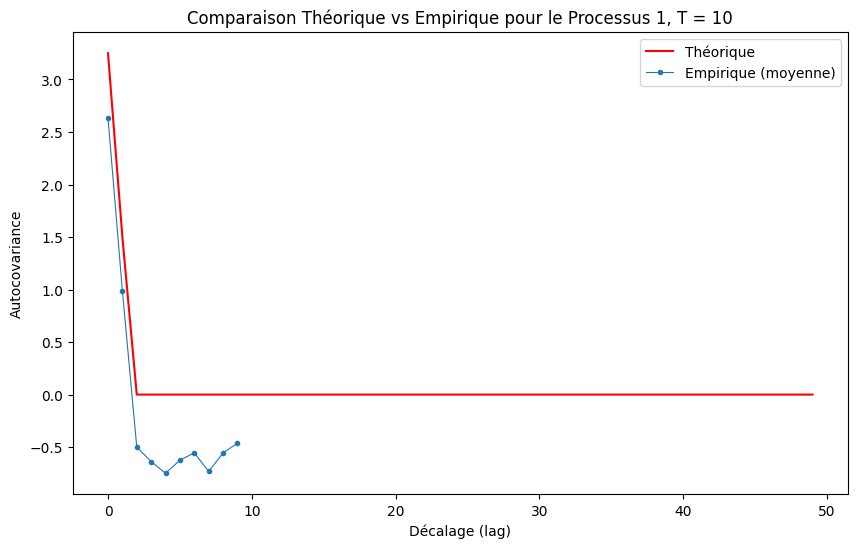

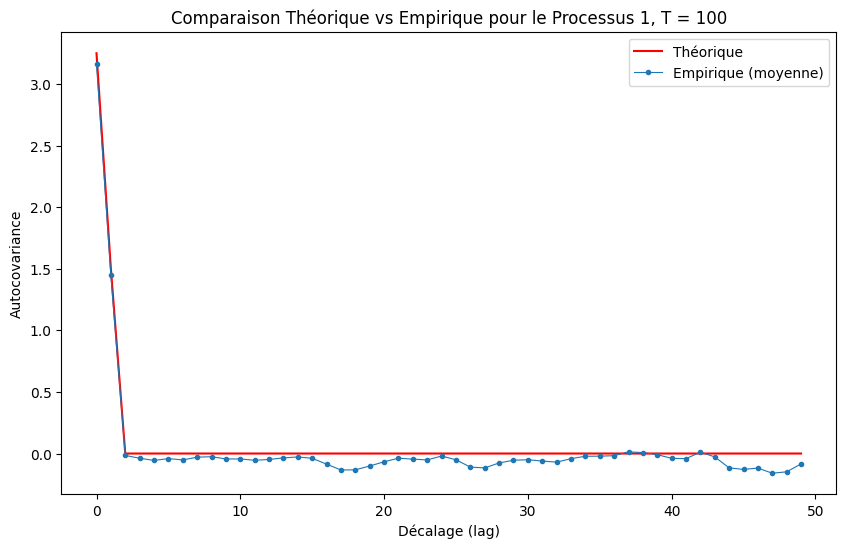

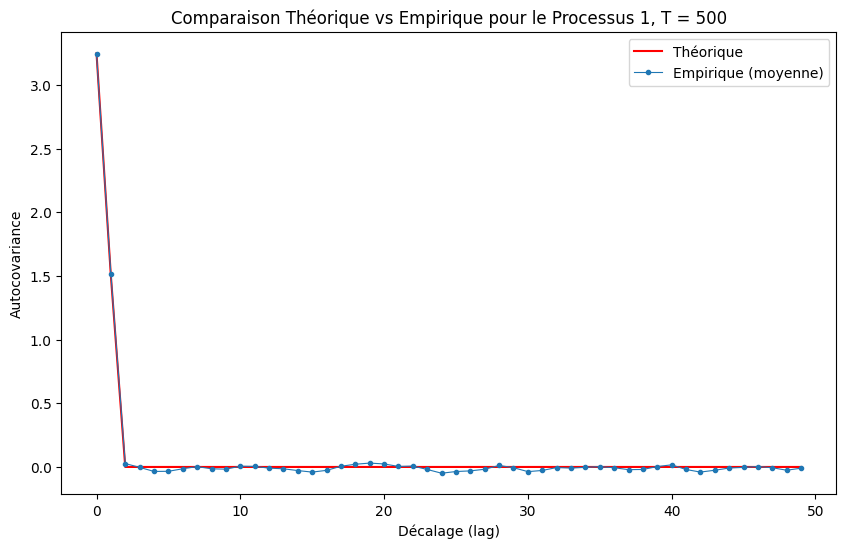

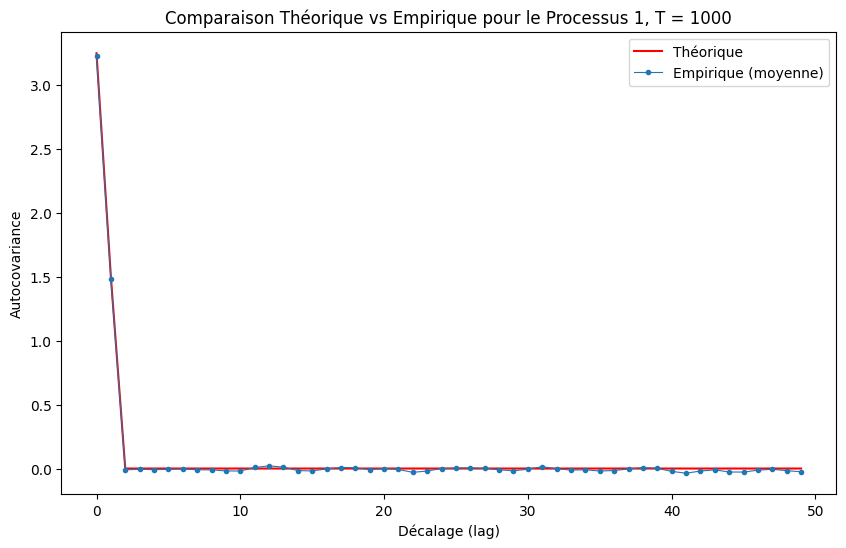

In [23]:
# Pour le processus 1 :

for T in T_values:
    plot_theoretical_vs_empirical(T, process_number=1)

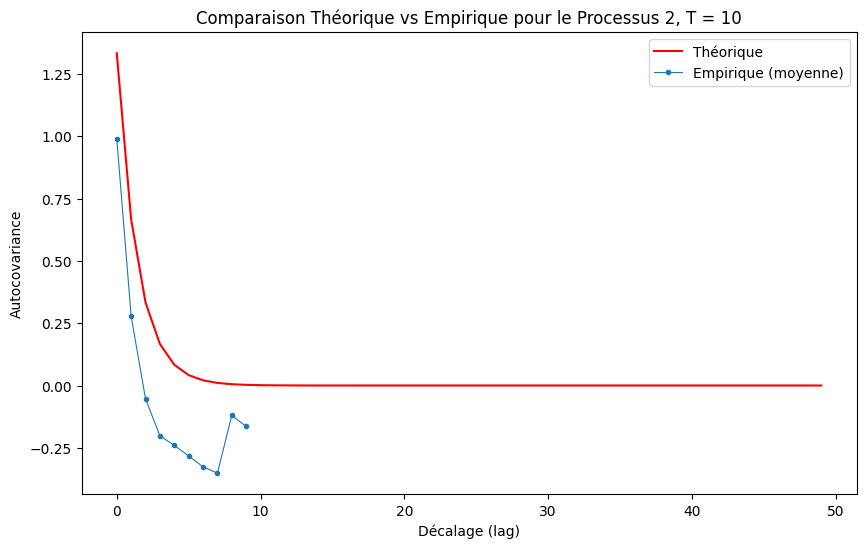

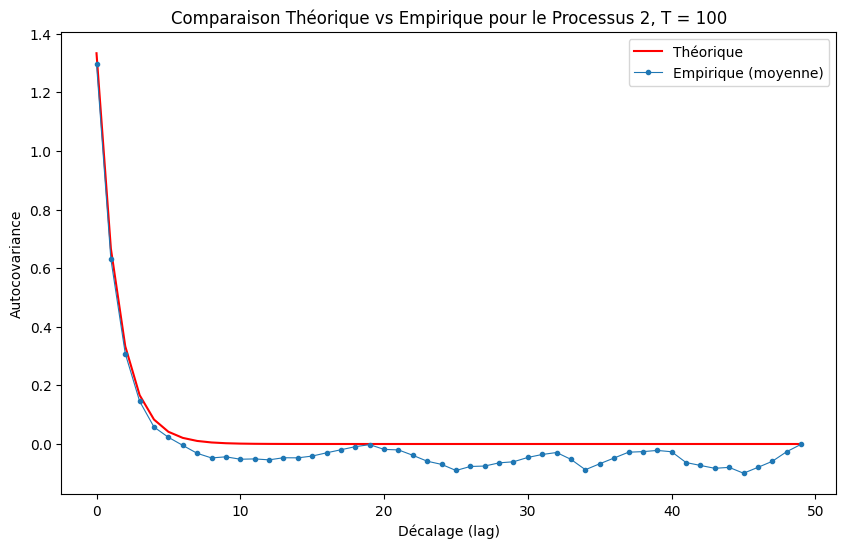

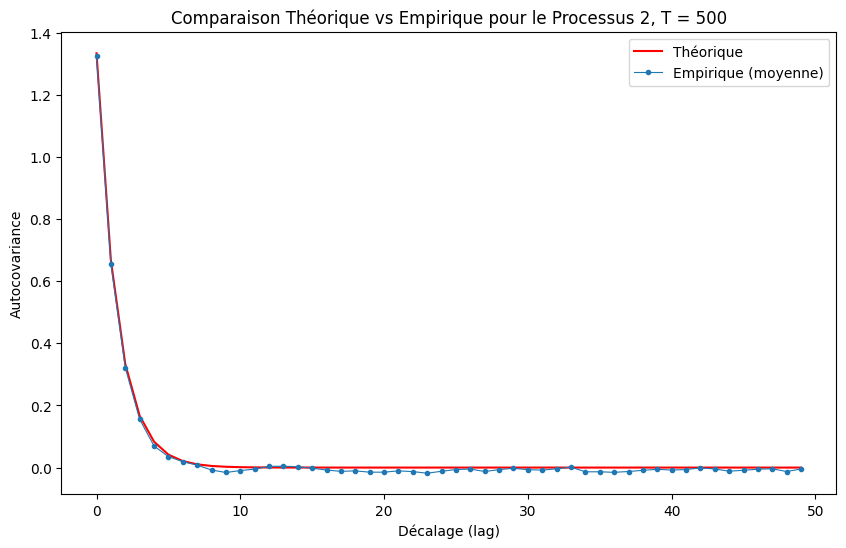

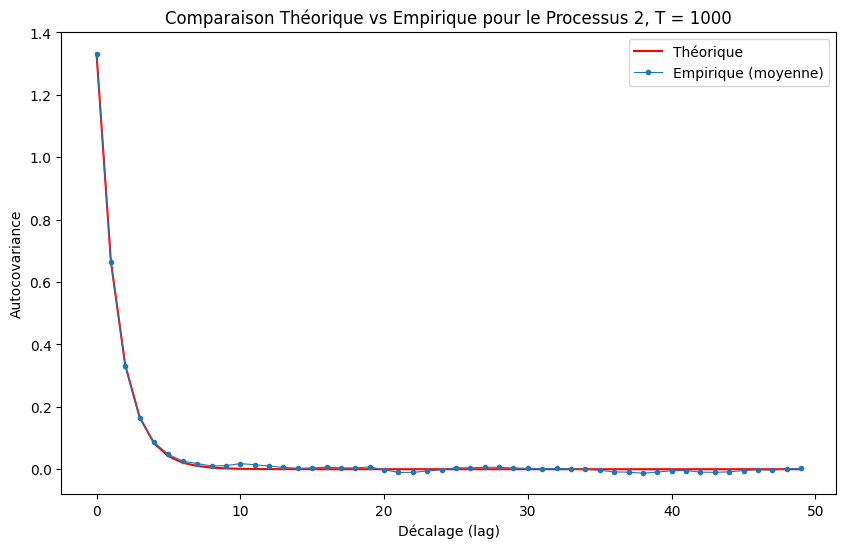

In [24]:
# Pour le processus 2 :

for T in T_values:
    plot_theoretical_vs_empirical(T, process_number=2)


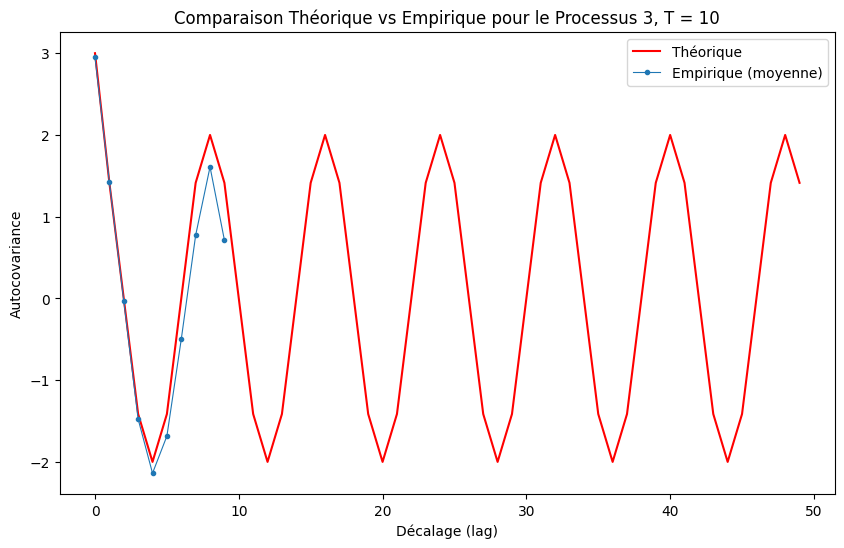

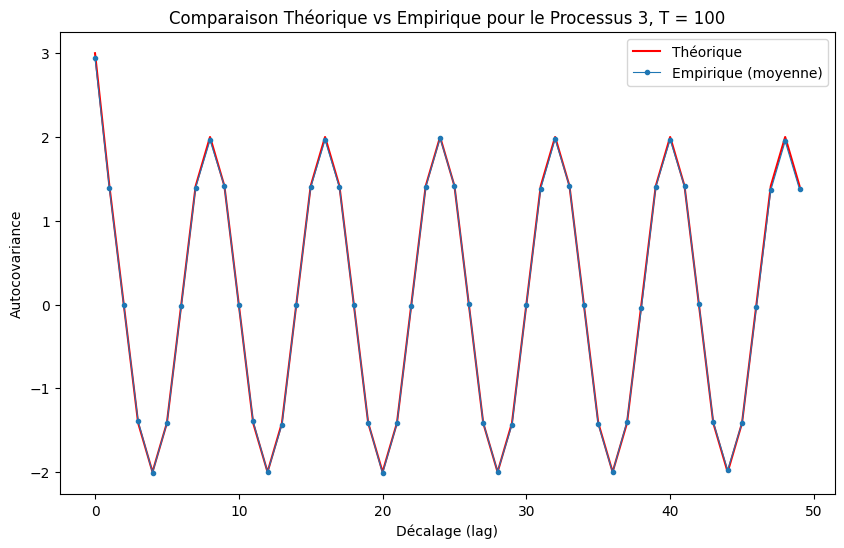

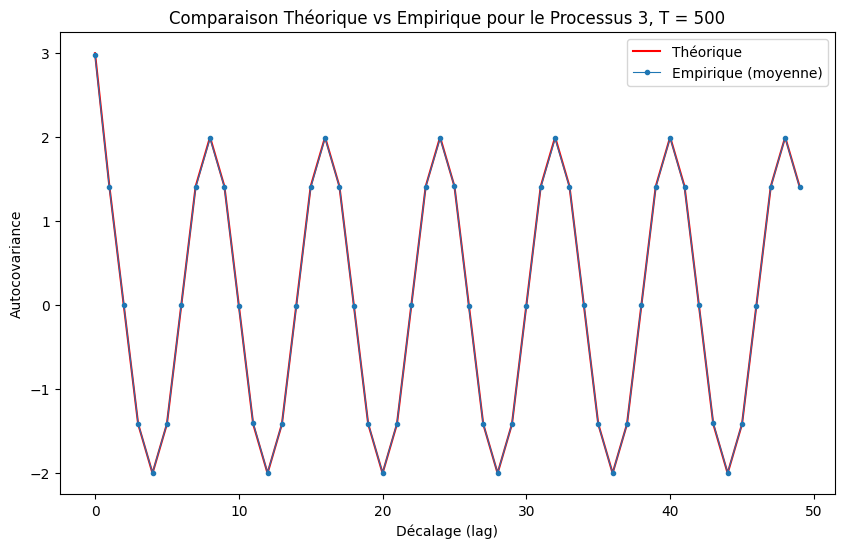

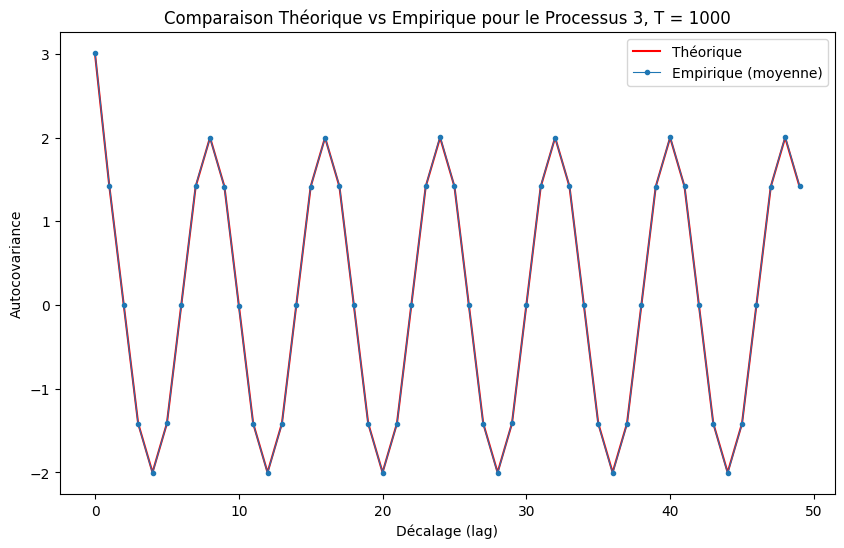

In [25]:
# Pour le processus 3 :

for T in T_values:
    plot_theoretical_vs_empirical(T, process_number=3)


Pour une petite taille d'échantillon (T = 10), les estimateurs empiriques présentent une grande variabilité et une forte incertitude due au faible nombre d'échantillons. Avec une taille d'échantillon moyenne (T = 100), la variabilité diminue, et les estimations empiriques se rapprochent des valeurs théoriques, avec une meilleure stabilité. Pour une grande taille d'échantillon (T = 500 et T = 1000), les estimateurs convergent nettement vers les valeurs théoriques, illustrant la loi des grands nombres et montrant une forte confiance dans les estimations.

### ### $\textbf{\textcolor{Goldenrod}{Question 4 :}}$

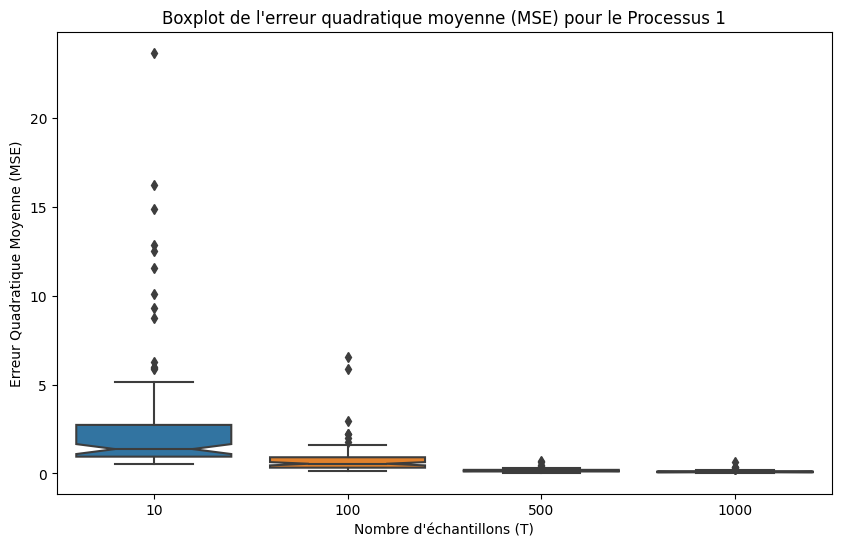

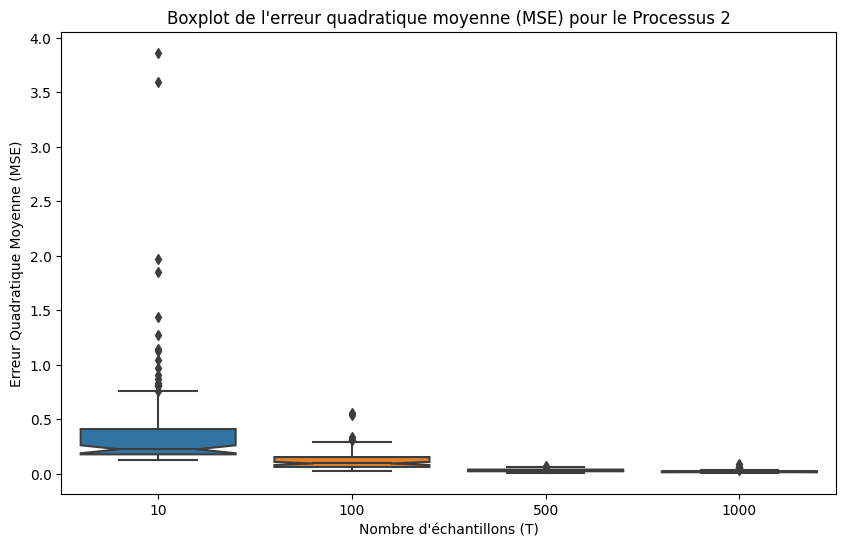

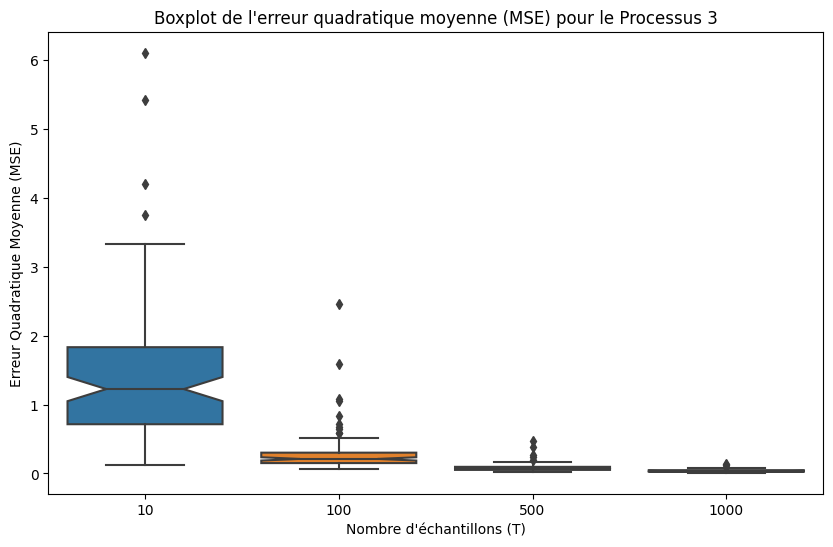

In [45]:


def mse(theoretical, empirical):
    return np.mean((np.array(theoretical) - np.array(empirical))**2)

def compute_mse_for_different_T(T_values, process_number):
    K = 10
    a = 1.0
    b = 1.5
    sigma = 1.0
    A0 = 2.0
    lambda0 = np.pi / 4

    mse_results = {T: [] for T in T_values}
    
    for T in T_values:
        for _ in range(100):
            if process_number == 1:
                X = simulate_process_1(T, a, b, sigma)
                theoretical_cov = [theoretical_autocov_process_1(h, b, sigma) for h in range(T)]
            elif process_number == 2:
                X = simulate_process_2(T, K, a, sigma)
                theoretical_cov = [theoretical_autocov_process_2(h, sigma, K) for h in range(T)]
                
            elif process_number == 3:
                X = simulate_process_3(T, A0, lambda0, sigma)
                theoretical_cov = [theoretical_autocov_process_3(h, A0, lambda0, sigma) for h in range(T)]

            empirical_cov = [empirical_autocovariance(X, h) for h in range(T)]
            mse_value = mse(theoretical_cov, empirical_cov)
            mse_results[T].append(mse_value)

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[mse_results[T] for T in T_values], notch=True)
    plt.xticks(range(len(T_values)), T_values)
    plt.xlabel('Nombre d\'échantillons (T)')
    plt.ylabel('Erreur Quadratique Moyenne (MSE)')
    plt.title(f'Boxplot de l\'erreur quadratique moyenne (MSE) pour le Processus {process_number}')
    plt.show()

compute_mse_for_different_T([10, 100, 500, 1000], process_number=1)
compute_mse_for_different_T([10, 100, 500, 1000], process_number=2)
compute_mse_for_different_T([10, 100, 500, 1000], process_number=3)


Avec une petite taille d'échantillon (T = 10), le MSE varie fortement, reflétant une grande incertitude dans les estimations. À mesure que la taille de l'échantillon augmente (T = 100), le MSE diminue et les estimations deviennent plus précises, montrant une distribution plus resserrée autour de la valeur réelle. Pour des tailles d'échantillon plus grandes (T = 500 et T = 1000), le MSE se rapproche de zéro, confirmant que les estimations empiriques atteignent les valeurs théoriques. Ainsi, la précision des estimations empiriques est fortement influencée par la taille de l'échantillon, avec une réduction de l'erreur à mesure que le nombre d'échantillons augmente.






